## YouTube API Info
Costs:
- Search: 100 credits per request (1-50 videos)
- Video Details: 1 credit per request (1-50 videos)
- Comment Threads: 1 credit per request (1-100 comment threads)

Quota: 10,000 credits per day
- Search: max 5,000 videos per day
- Video Details: max 500,000 videos per day
- Comment Threads: max 1,000,000 comment threads per day

In [7]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from dotenv import load_dotenv
from tqdm import tqdm
from datetime import datetime

from youtube_helper import YouTubeHelper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
DATA_DIR = Path.cwd() / 'content'
COMMENTS_DIR = DATA_DIR / 'video_comments'
SEARCH_DIR = DATA_DIR / 'video_search'

In [9]:
yt = YouTubeHelper()

### Example

In [ ]:
start_date_ex = pd.to_datetime('2019-01-01')
end_date_ex = start_date_ex + pd.DateOffset(months=1)

print(start_date_ex, "-", end_date_ex)

results_ex = yt.search(
    "한국 핵무장",
    start_date=start_date_ex,
    end_date=end_date_ex,
    order_by="rating",
    results_to_get=50,
)

results_ex['query'] = '한국 핵무장'

In [ ]:
print(len(results_ex))
results_ex

### Pipeline

In [248]:
results = yt.rolling_search(
    query="한국 핵무장",
    start_date=pd.to_datetime('2023-04-01'),
    window_size=3, # in months
    num_windows=40, # num_windows * window_size = total months
    results_per_window=100,
    direction='backward',
    # test_dates=True,
)

Searching for '한국 핵무장' from 2015-01-01 00:00:00 to 2015-03-31 23:59:59: 100%|██████████| 33/33 [00:24<00:00,  1.33it/s]


In [268]:
results.to_csv(SEARCH_DIR / f"search_results_{datetime.now().strftime('%Y%m%d-%H%M')}.csv", index=False)

In [ ]:
# search_results_20230501-0122.csv

In [5]:
results.head()

,published_at,video_id,video_title,video_description,channel_id,channel_title,etag,window_start,window_end,query,collection_date
0,2023-02-02T05:46:30Z,fYX_Mru5tNw,"[자막뉴스] &quot;한국 핵무장, 전 세계 소프트파워 파괴&quot; 강력한 경...",미국의 지그프리드 해커 박사는 한국의 핵무장을 주제로 한 세미나에서 한국의 과학기술...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,bncw-sVYhft26xeyu4AM6BZbvxo,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
1,2023-02-13T05:10:50Z,9fS-DF4xn5k,과거 프랑스 드골의 핵무장 논리 지금 한국에 맞는가...,서울의소리 유튜브 계정은 지난 6월부터 모든 수익 창출이 정지되었습니다. 서울의소리...,UCUxTPRSns--l5BX2537u7Rw,서울의소리 Voice of Seoul,7a58MzdsFnS6RkmmHGossp2oUB8,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
2,2023-01-28T03:08:32Z,DjX42uSww9I,&#39;한국 핵무장론&#39; 미국의 심층 보도...보고서 내용 공개 / YTN,"CNN, 한국 핵무장론 증가 배경 보도 ""핵무장 발언은 국내 지지층 의식한 포퓰리즘...",UChlgI3UHCOnwUGzWzbJ3H5w,YTN,38t-Xm7F2C2D3k8ALgH-Dbl4uos,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
3,2023-03-25T12:00:07Z,WjUEDHlvlKQ,"[워싱턴 톡] 한국 핵무장, 미국 전략적 이익에 부합하나? 예외 인정될까?",북한이 각종 무기 실험으로 한국의 방어망을 무력화하려고 하지만 실전에서 미군 증원과...,UC8d0ZgFEl4AUdyAKGE8O3yg,VOA 한국어,FQP-aN7w_x9tcsR9i2huZzxZSJ8,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
4,2023-01-04T06:49:15Z,pbst6XB7GVY,[자막뉴스] &quot;한국은 핵 보유국이...&quot; 미국의 강력한 한마디 /...,백악관은 조 바이든 대통령이 한미 핵 공동 연습 계획이 없다고 말한 건 한국이 핵 ...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,hU8KD_na2w9R33OfLvieuhudVss,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25


In [4]:
results = pd.read_csv(SEARCH_DIR / 'search_results_20230501-0122.csv')

### Get Details

In [20]:
results.head(1)

,published_at,video_id,video_title,video_description,channel_id,channel_title,etag,window_start,window_end,query,collection_date
0,2023-02-02T05:46:30Z,fYX_Mru5tNw,"[자막뉴스] &quot;한국 핵무장, 전 세계 소프트파워 파괴&quot; 강력한 경...",미국의 지그프리드 해커 박사는 한국의 핵무장을 주제로 한 세미나에서 한국의 과학기술...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,bncw-sVYhft26xeyu4AM6BZbvxo,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25


In [10]:
id_list = results['video_id'].tolist()

In [11]:
details = yt.video_details(id_list)

In [13]:
# total comment count
details['comment_count'].sum()

360469

In [24]:
# map window_start, window_end, query, and collection date from results to details
details['window_start'] = details['video_id'].map(results.set_index('video_id')['window_start'])
details['window_end'] = details['video_id'].map(results.set_index('video_id')['window_end'])
details['query'] = details['video_id'].map(results.set_index('video_id')['query'])
details['collection_date'] = details['video_id'].map(results.set_index('video_id')['collection_date'])

In [25]:
details.head(1)

,published_at,video_id,video_title,video_description,channel_id,channel_title,tags,category_id,duration,view_count,like_count,comment_count,regions_blocked,regions_allowed,content_rating,etag,window_start,window_end,query,collection_date
0,2023-02-02T05:46:30Z,fYX_Mru5tNw,"[자막뉴스] ""한국 핵무장, 전 세계 소프트파워 파괴"" 강력한 경고 / YTN",미국의 지그프리드 해커 박사는 한국의 핵무장을 주제로 한 세미나에서 한국의 과학기술...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,"[YTN실시간, YTN]",25,PT2M32S,1911736,11577,10295,NaN,None,None,-Cy8CIs76Ylr0SvilBHAxD4hBsk,2023-01-01,2023-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25


In [26]:
details.to_csv(SEARCH_DIR / 'video_details_20230501-0122.csv', index=False)

### EDA

In [28]:
# sort by highest view count
details.sort_values(by='view_count', ascending=False).head()

,published_at,video_id,video_title,video_description,channel_id,channel_title,tags,category_id,duration,view_count,like_count,comment_count,regions_blocked,regions_allowed,content_rating,etag,window_start,window_end,query,collection_date
475,2020-10-17T03:00:01Z,KDKjmzSbryM,(ENG)북한이 한국에게 핵을 쏘면 생기는 일?,#미사일 #북한핵 #북한\n\n오늘은 미사일 전문가 멋진창창님과 함께\n\n북한의 ...,UCoCvTlU0KpNYwnMIgs7MPrA,보다 BODA,"[씨랩, CLAB, 소셜, 리액션, Youtube reaction, react, k...",24,PT15M36S,5766047,<NA>,<NA>,NaN,None,None,wGuGJ5miKX67ItJdDXho-PVbpcQ,2020-10-01,2020-12-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
233,2022-03-02T10:22:28Z,wgSyHiqkZfU,"[자막뉴스] ""푸틴은 독재자""...바이든, 연설 중 한국도 거론 / YTN",지난해 1월 취임 이후 처음으로 국정연설에 나선 바이든 미 대통령.\n\n러시아의 ...,UChlgI3UHCOnwUGzWzbJ3H5w,YTN,"[source:영상, type:디지털, genre:국제, format:기타, ser...",25,PT2M14S,5256414,46713,7743,NaN,None,None,yFH4Ksxo_gNiaehMUf0lJt2cEyo,2022-01-01,2022-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
262,2022-02-22T02:00:12Z,zUe-pXMi5B0,"[K디펜스] ""美 첫 24대...주변국 초긴장"" 韓 하늘에 '세계최강' 등장 / ...",지구상에서 가장 강력한 공격헬기인 신형 아파치 헬기가 주한미군에 실전 배치됐습니다....,UClErHbdZKUnD1NyIUeQWvuQ,MTN 머니투데이방송,"[아파치, 공격헬기, 주한미군, 신형, 평택, 미군, 헬기, AH64, 북한, 여의...",25,PT2M37S,4267622,33601,1965,NaN,None,None,frulvGkDeTYUfuS7fmsZYKowFU4,2022-01-01,2022-03-31 23:59:59,한국 핵무장,2023-05-01 01:06:25
315,2021-09-11T22:00:09Z,OnURsktTA9s,韓 보복무기 세계가 깜짝 “미스터리 3개 더 남았다” [K디펜스 / 머니투데이방송],"지난 9월 1일, 한국 해군의 신형 3000t급 잠수함 도산 안창호 함에서 SLBM...",UClErHbdZKUnD1NyIUeQWvuQ,MTN 머니투데이방송,"[미사일협정, 현무, 4-4, 4-1, 보라매, 해군, 도산안창호함, SLBM, 잠...",25,PT3M59S,4125199,33974,1302,NaN,None,None,UoiSo8EDAnGwPAJsZWkx_ZrYGYo,2021-07-01,2021-09-30 23:59:59,한국 핵무장,2023-05-01 01:06:25
550,2020-09-18T07:00:03Z,FF7xu8PnwJ8,"RIMPAC 미해군 핵항모 등 15척 전멸, 세계 최강 반열에 등극한 한국 해군의 ...",#원샷원킬 #퍼펙트_장보고 #잠수함\n\n작지만 치명적인 위력을 지닌 최강의 전력무...,UCFCtZJTuJhE18k8IXwmXTYQ,EBSDocumentary (EBS 다큐),"[EBS, EBS documentary, EBS 다큐멘터리, 다큐, docu, 강철...",19,PT30M54S,3791012,33200,1631,NaN,None,None,b_QmjYvaqxWlSuEkEi7rbk6e8f4,2020-07-01,2020-09-30 23:59:59,한국 핵무장,2023-05-01 01:06:25


<Axes: ylabel='Frequency'>

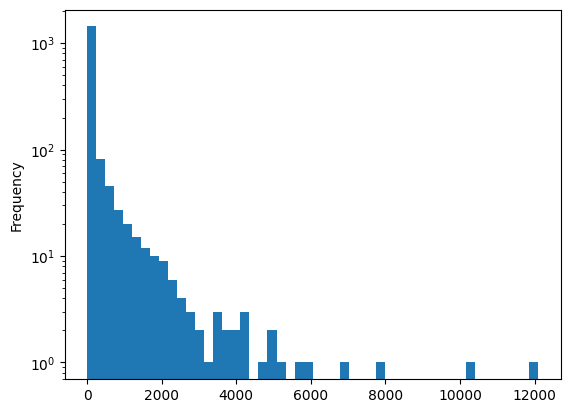

In [31]:
# plot the view count distribution on x-axis
details['comment_count'].plot.hist(bins=50, logy=True)